In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import scienceplots

plt.style.reload_library()
plt.style.use(["science", "ieee", "no-latex", "notebook", "grid", "vibrant"])

datapath =  # Add path to the csv file from wandb

crf = []
vime_train = []
vime_full = []

for p in [0.1,0.2,0.3,0.4,0.5]:
  crf_tmp = []
  vimet_tmp = []
  vime_tmp = []

  if p<0.3:
    dset = ['concrete', 'star', 'facebook_2', 'community', 'bike']
  else:
    dset = ['facebook_2', 'community', 'bike', 'concrete', 'star', 'blog_data']


  for dataset in dset:

    res = pd.read_csv(datapath)

    res = res[res['Dataset']==dataset]
    metric = 'length'
    cols = [f'CFR.CFR.avg_{metric}',f'CFR.CFR+VIME_TRAIN.avg_{metric}',f'CFR.CFR+VIME.avg_{metric}' ]

    res = res[res['Labeled Prop']==p][cols]

    means = np.nanmean(res[np.abs(stats.zscore(res)) < 1], axis=0)

    crf_tmp.append(means[0])
    vimet_tmp.append(means[1])
    vime_tmp.append(means[2])
   
  crf.append(np.mean(crf_tmp))
  vime_train.append(np.mean(vimet_tmp))
  vime_full.append(np.mean(vime_tmp))



In [7]:
x_vals = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
crf = np.array(crf)
vime_lab = np.array(vime_train)
vime_all = np.array(vime_full)

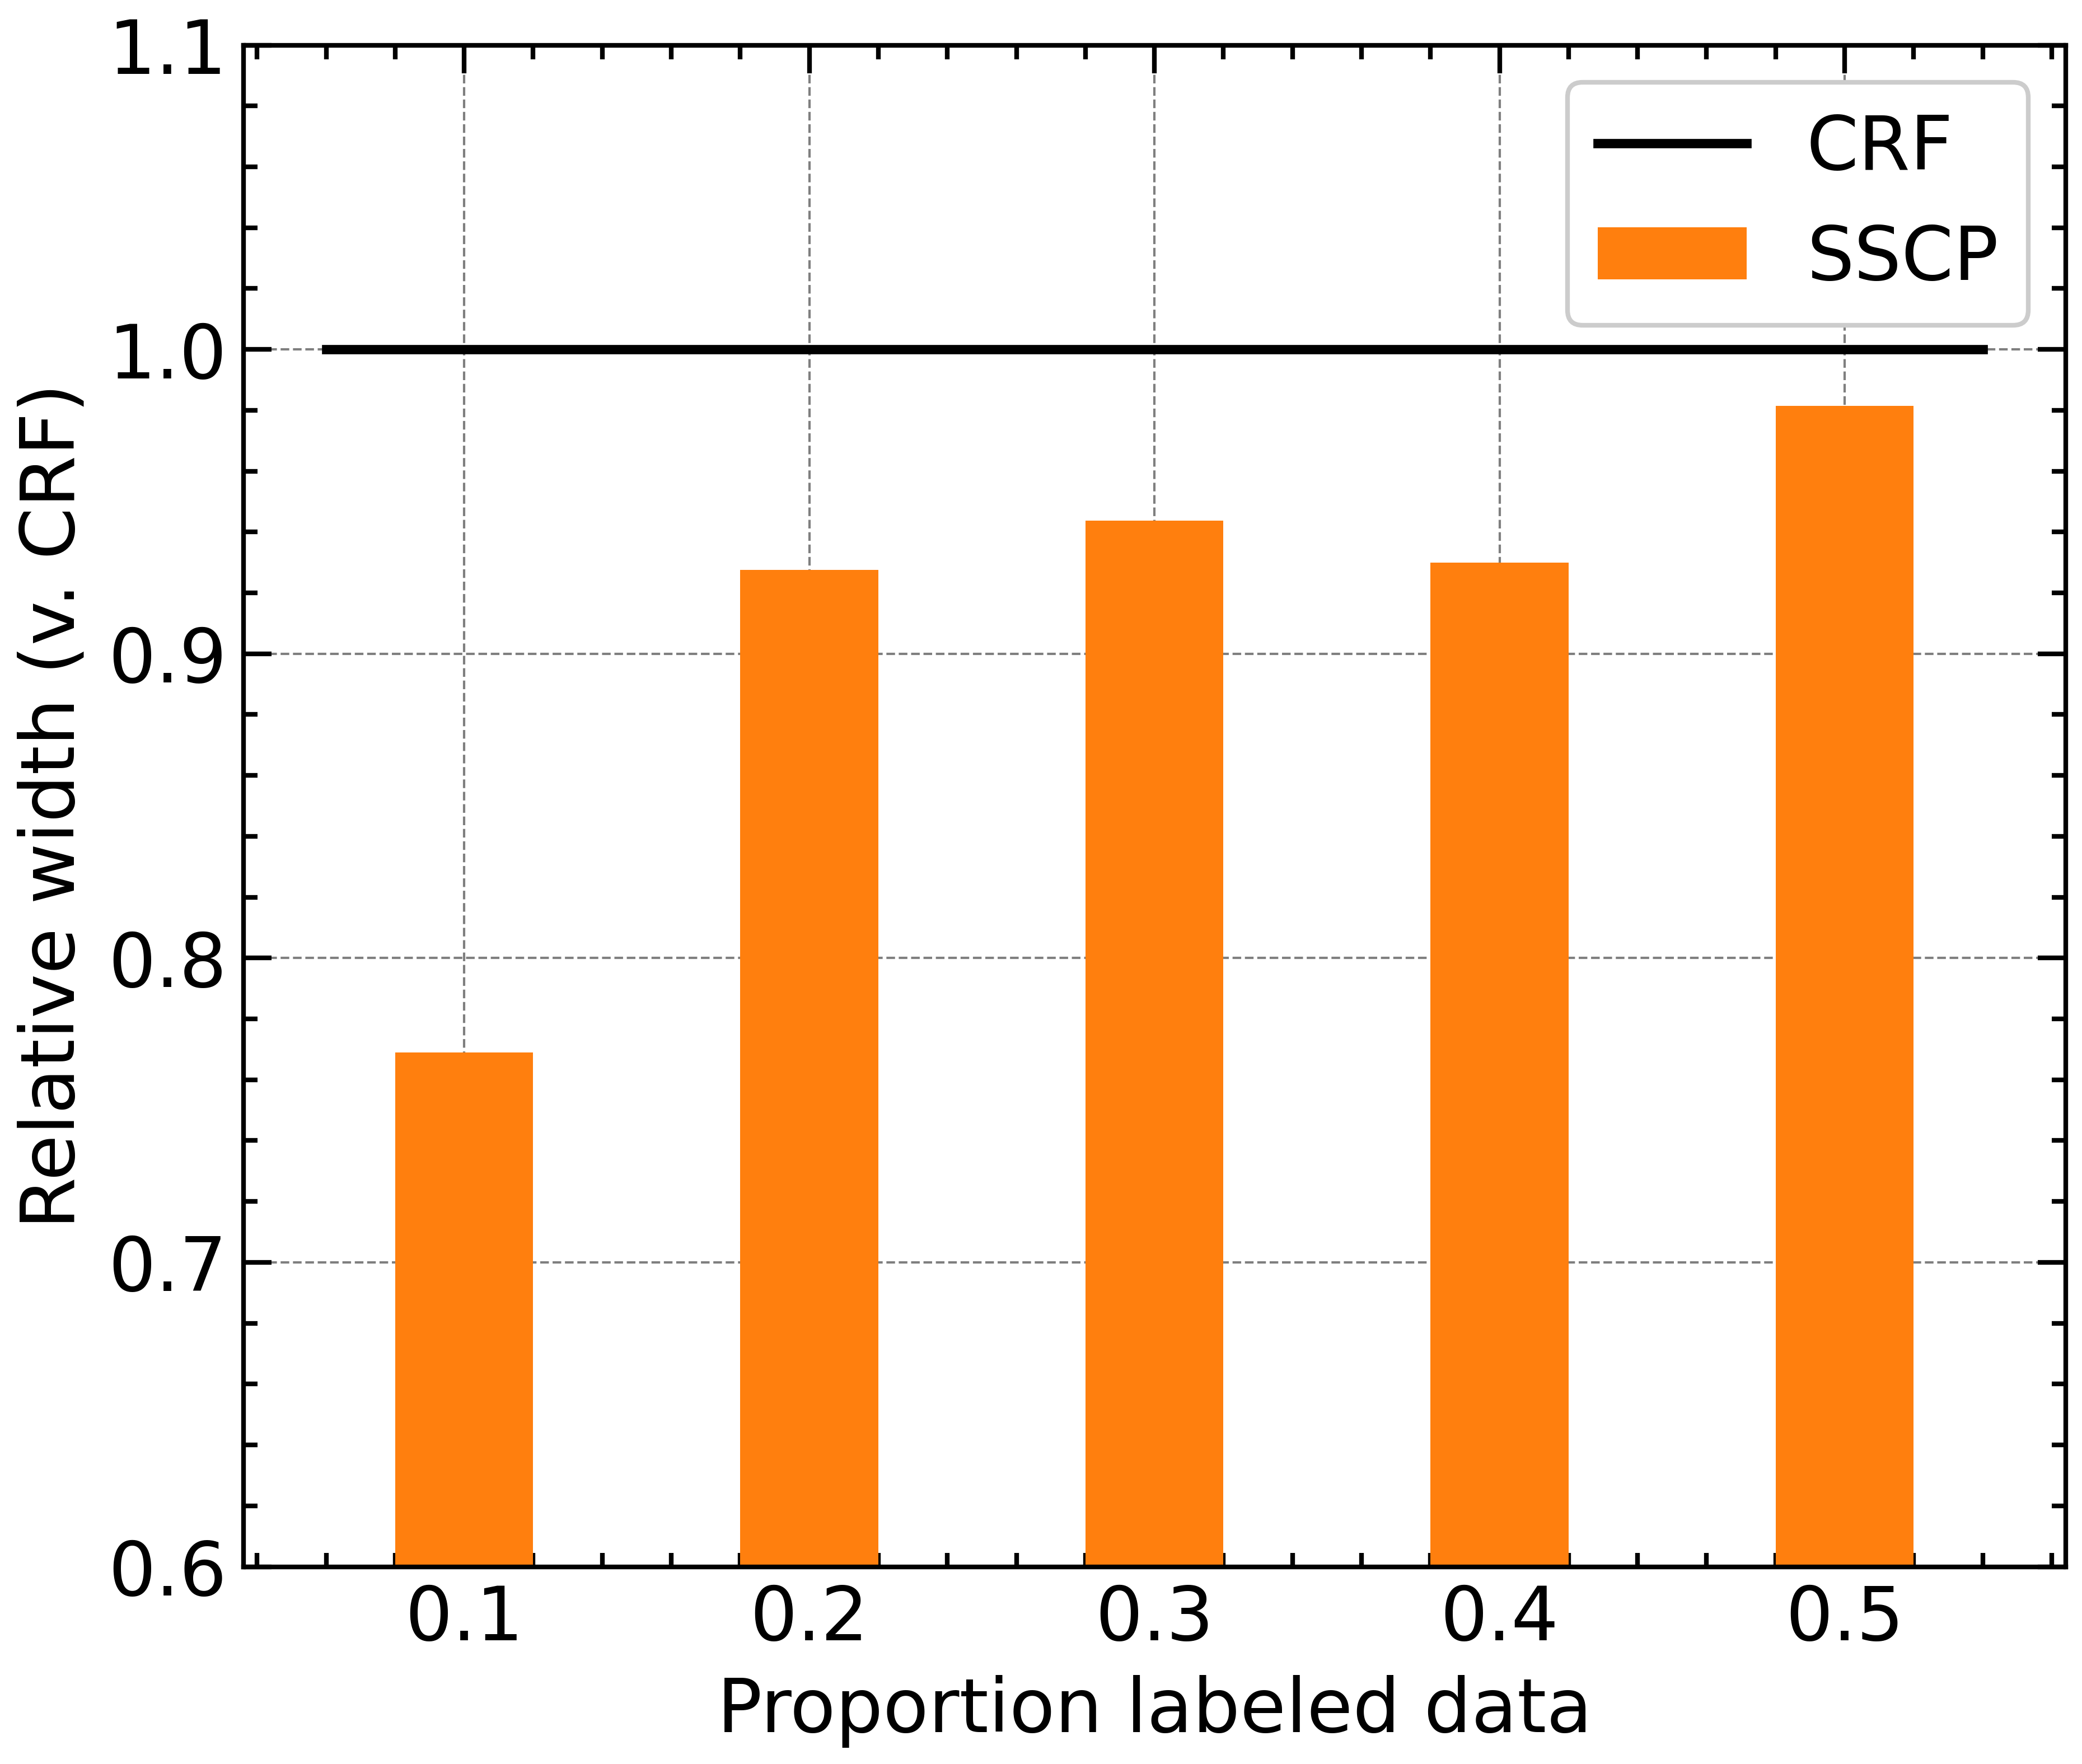

In [8]:
plt.figure(figsize=(7,6))
plt.plot([x_vals[0]-0.04, x_vals[-1]+0.04], [1.0, 1.0], label='CRF', color='Black')
plt.bar(x_vals, vime_all/crf, 0.04, label='SSCP', color='tab:orange')

plt.xlabel('Proportion labeled data')
plt.ylabel('Relative width (v. CRF)')

plt.ylim(0.6, 1.1)
plt.legend()

plt.show()